
💰 Profit Maximization Model
Status: Optimal
A: 17.5
B: 0.0
C: 27.5
D: 37.5
Maximum Profit: ₹13525.0

📊 Sensitivity Analysis (Reduced Costs)
Product_A: Value = 17.5, Reduced Cost = -0.0
Product_B: Value = 0.0, Reduced Cost = -2.5
Product_C: Value = 27.5, Reduced Cost = -0.0
Product_D: Value = 37.5, Reduced Cost = -0.0

🦮 Shadow Prices and Slack for Constraints
Machine1_Capacity: Shadow Price = 22.5, Slack = -0.0
Machine2_Capacity: Shadow Price = 72.5, Slack = -0.0
Machine3_Capacity: Shadow Price = 32.5, Slack = -0.0
Raw_Material: Shadow Price = -0.0, Slack = 30.0
Minimum_Production: Shadow Price = -0.0, Slack = -2.5

🔁 Cost Minimization Model
Status: Optimal
A: 20.0
B: 0.0
C: 20.0
D: 40.0
Minimum Cost: ₹11800.0


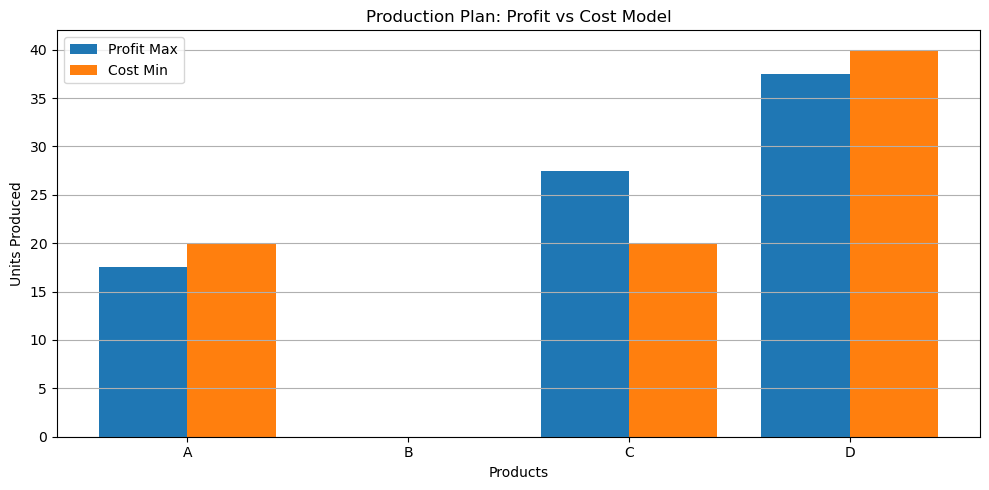

In [38]:
from pulp import LpProblem, LpMaximize, LpMinimize, LpVariable, value, LpStatus
import matplotlib.pyplot as plt

# Product data
products = ['A', 'B', 'C', 'D']
profit_per_unit = {'A': 200, 'B': 180, 'C': 160, 'D': 150}
cost_per_unit = {'A': 150, 'B': 170, 'C': 160, 'D': 140}

# Machine usage and availability
machine_hours = {
    'Machine1': {'A': 1, 'B': 2, 'C': 1, 'D': 2},
    'Machine2': {'A': 2, 'B': 1, 'C': 1, 'D': 1},
    'Machine3': {'A': 1, 'B': 2, 'C': 2, 'D': 1}
}
machine_availability = {'Machine1': 120, 'Machine2': 100, 'Machine3': 110}

# Raw material usage and limit
raw_material_per_unit = {'A': 3, 'B': 4, 'C': 2, 'D': 3}

# Parameterized function to run the models
def run_models(min_production=80, raw_material_limit=250):
    # Decision variables
    x = LpVariable.dicts("Product", products, lowBound=0, cat="Continuous")

    # Profit Maximization Model
    profit_model = LpProblem("Maximize_Profit", LpMaximize)
    profit_model += sum(profit_per_unit[i] * x[i] for i in products), "Total_Profit"

    for machine, hours in machine_hours.items():
        profit_model += sum(hours[i] * x[i] for i in products) <= machine_availability[machine], f"{machine}_Capacity"
    profit_model += sum(raw_material_per_unit[i] * x[i] for i in products) <= raw_material_limit, "Raw_Material"
    profit_model += sum(x[i] for i in products) >= min_production, "Minimum_Production"

    profit_model.solve()

    print("\n\U0001F4B0 Profit Maximization Model")
    print(f"Status: {LpStatus[profit_model.status]}")
    for i in products:
        print(f"{i}: {x[i].varValue}")
    print(f"Maximum Profit: ₹{value(profit_model.objective)}")

    print("\n\U0001F4CA Sensitivity Analysis (Reduced Costs)")
    for v in profit_model.variables():
        print(f"{v.name}: Value = {v.varValue}, Reduced Cost = {v.dj}")

    print("\n\U0001F9AE Shadow Prices and Slack for Constraints")
    for name, constraint in profit_model.constraints.items():
        print(f"{name}: Shadow Price = {constraint.pi}, Slack = {constraint.slack}")

    # Cost Minimization Model
    x_cost = LpVariable.dicts("Product_Cost", products, lowBound=0, cat="Continuous")

    cost_model = LpProblem("Minimize_Cost", LpMinimize)
    cost_model += sum(cost_per_unit[i] * x_cost[i] for i in products), "Total_Cost"

    for machine, hours in machine_hours.items():
        cost_model += sum(hours[i] * x_cost[i] for i in products) <= machine_availability[machine], f"{machine}_Capacity"
    cost_model += sum(raw_material_per_unit[i] * x_cost[i] for i in products) <= raw_material_limit, "Raw_Material"
    cost_model += sum(x_cost[i] for i in products) >= min_production, "Minimum_Production"

    cost_model.solve()

    print("\n\U0001F501 Cost Minimization Model")
    print(f"Status: {LpStatus[cost_model.status]}")
    for i in products:
        print(f"{i}: {x_cost[i].varValue}")
    print(f"Minimum Cost: ₹{value(cost_model.objective)}")

    # Visualization
    profit_values = [x[i].varValue for i in products]
    cost_values = [x_cost[i].varValue for i in products]

    x_pos = range(len(products))
    plt.figure(figsize=(10, 5))
    plt.bar(x_pos, profit_values, width=0.4, label='Profit Max', align='center')
    plt.bar([p + 0.4 for p in x_pos], cost_values, width=0.4, label='Cost Min', align='center')
    plt.xticks([p + 0.2 for p in x_pos], products)
    plt.title("Production Plan: Profit vs Cost Model")
    plt.xlabel("Products")
    plt.ylabel("Units Produced")
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Run the function
run_models(min_production=80, raw_material_limit=250)
